# **Python Regex**

* A regular expression (or regex) is a sequence of characters that specifies a search pattern. In practice, you’ll find the regular expressions in many applications such as search engines, search and replace dialogs of text editors.

* In Python, a regular expression is a separate programming language. It is embedded in Python. To interact with the regular expressions, you use the built-in re module:

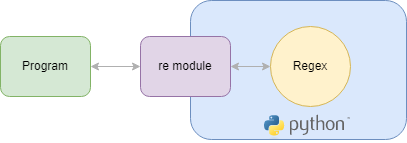

* The re module has many helpful classes and functions that help you to manage regular expressions effectively.
* The following shows an example of a simple regular expression:

In [1]:
'\d'

'\\d'

* In this example, a regular expression is a string that contains a search pattern. The '\d' is a digit character set that matches any single digit from 0 to 9.
* To use this regular expression, you follow these steps:

  * First, import the re module:

In [2]:
import re

* Second, compile the regular expression into a Pattern object:

In [3]:
p = re.compile('\d')


* Third, use one of the methods of the Pattern object to match a string:

In [4]:
s = "Python 3.10 was released on October 04, 2021"
result = p.findall(s)

print(result)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


In [5]:
#The findall() method returns a list of single digits in the string s.
# The following shows the complete program:
import re


p = re.compile('\d')
s = "Python 3.10 was released on October 04, 2021"

results = p.findall(s)
print(results)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


* Besides the findall() method, the Pattern object has other essential methods that allow you to match a string:
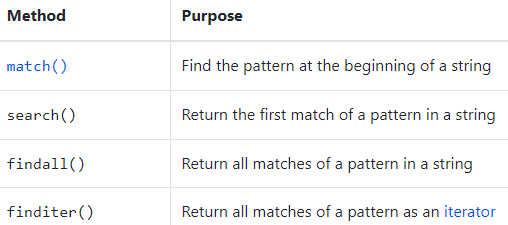

## **Python regular expression functions**
* Besides the Pattern class, the re module has some functions that match a string for a pattern:

  * match()
  * search()
  * findall()
  * finditer()
* These functions have the same names as the methods of the Pattern object. Also, they take the same arguments as the corresponding methods of the Pattern object. 
* However, you don’t have to manually compile the regular expression before using it.

* The following example shows the same program that uses the findall() function instead of the findall() method of a Pattern object:

In [6]:
import re

s = "Python 3.10 was released on October 04, 2021."
results = re.findall('\d',s)
print(results)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


* Using the functions in the re module is more concise than the methods of the Pattern object because you don’t have to compile regular expressions manually.

* Under the hood, these functions create a Pattern object and call the appropriate method on it. They also store the compiled regular expression in a cache for speed optimization.

* It means that if you call the same regular expression from the second time, these functions will not need to recompile the regular expression. Instead, they get the compiled regular expression from the cache.

* Should you use the re functions or methods of the Pattern object?

* If you use a regular expression within a loop, the Pattern object may save a few function calls. However, if you use it outside of loops, the difference is very little due to the internal cache.

* The following sections discuss the most commonly used functions in the re module including search(), match(), and fullmatch().

### **search() function**
* The search() function searches for a pattern within a string. If there is a match, it returns the first Match object or None otherwise. For example:


In [7]:
import re

s = "Python 3.10 was released on October 04, 2021."

pattern = '\d{2}'
match = re.search(pattern, s) 
print(type(match))
print(match)

<class 're.Match'>
<re.Match object; span=(9, 11), match='10'>


* In this example, the search() function returns the first two digits in the string s as the Match object.

### **Match object**
* The Match object provides the information about the matched string. It has the following important methods:
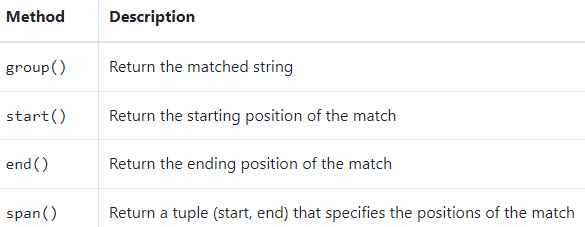

In [8]:
#The following example examines the Match object:
import re


s = "Python 3.10 was released on October 04, 2021."
result = re.search('\d', s) 

print('Matched string:',result.group())
print('Starting position:', result.start())
print('Ending position:',result.end())
print('Positions:',result.span())

Matched string: 3
Starting position: 7
Ending position: 8
Positions: (7, 8)


### **match() function**
* The match() function returns a Match object if it finds a pattern at the beginning of a string. For example:


In [9]:
import re

l = ['Python', 
    'CPython is an implementation of Python written in C', 
    'Jython is a Java implementation of Python',
     'IronPython is Python on .NET framework']

pattern = '\wython'
for s in l:
    result = re.match(pattern,s)
    print(result)

<re.Match object; span=(0, 6), match='Python'>
None
<re.Match object; span=(0, 6), match='Jython'>
None


* In this example, the \w is the word character set that matches any single character.

* The \wython matches any string that starts with any sing word character and is followed by the literal string ython, for example, Python.

* Since the match() function only finds the pattern at the beginning of a string, the following strings match the pattern:<br />
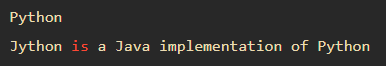

* And the following string doesn’t match:<br />
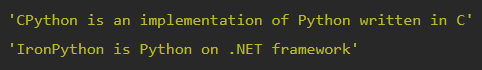

### **fullmatch() function**
* The fullmatch() function returns a Match object if the whole string matches a pattern or None otherwise. 
* The following example uses the fullmatch() function to match a string with four digits:




In [10]:
import re

s = "2021"
pattern = '\d{4}'
result = re.fullmatch(pattern, s)
print(result)

<re.Match object; span=(0, 4), match='2021'>


* The pattern '\d{4}' matches a string with four digits. Therefore, the fullmatch() function returns the string 2021.

* If you place the number 2021 at the middle or the end of the string, the fullmatch() will return None. For example:

In [11]:
import re

s = "Python 3.10 released in 2021"
pattern = '\d{4}'
result = re.fullmatch(pattern, s)
print(result)


None


## **Regular expressions and raw strings**
* It’s important to note that Python and regular expression are different programming languages. They have their own syntaxes.

* The re module is the interface between Python and regular expression programming languages. It behaves like an interpreter between them.

* To construct a pattern, regular expressions often use a backslash '\' for example \d and \w . But this collides with Python’s usage of the backslash for the same purpose in string literals.

* For example, suppose you need to match the following string:
<br />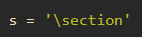

* In Python, the backslash (\) is a special character. To construct a regular expression, you need to escape any backslashes by preceding each of them with a backslash (\):<br />
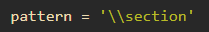

* In regular expressions, the pattern must be '\\section'. However, to express this pattern in a string literal in Python, you need to use two more backslashes to escape both backslashes again:<br />
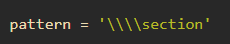

* Simply put, to match a literal backslash ('\'), you have to write '\\\\' because the regular expression must be '\\' and each backslash must be expressed as '\\' inside a string literal in Python.

* This results in lots of repeated backslashes. Hence, it makes the regular expressions difficult to read and understand.

* A solution is to use the raw strings in Python for regular expressions because raw strings treat the backslash (\) as a literal character, not a special character.

* To turn a regular string into a raw string, you prefix it with the letter r or R. For example:

In [12]:
import re

s = '\section'
pattern = r'\\section'
result = re.findall(pattern, s)

print(result)


['\\section']


* Note that in Python ‘\section’ and ‘\\section’ are the same:

In [13]:
p1 = '\\section'
p2 = '\section'

print(p1==p2) # true

True


* In practice, you’ll find the regular expressions constructed in Python using the raw strings.

## **Python Regex Character Set**
### **Introduction to Python regex character sets**
* A character set (or a character class) is a set of characters, for example, digits (from 0 to 9), alphabets (from a to z), and whitespace.

* A character set allows you to construct regular expressions with patterns that match a string with one or more characters in a set.

### **\d: digit character set**
* Regular expressions use \d to represent a digit character set that matches a single digit from 0 to 9.

* The following example uses the finditer() function to match every single digit in a string using the \d character set:

In [14]:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d', s)
for match in matches:
    print(match.group())

3
0
2
0
0
8


In [15]:
#To match a group of two digits, you use the \d\d. For example:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d\d', s)
for match in matches:
    print(match.group())

20
08


In [16]:
#Similarly, you can match a group of four digits using the \d\d\d\d pattern:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d\d\d\d', s)
for match in matches:
    print(match.group())

2008


* Later, you’ll learn how to use quantifiers to shorten the pattern. So instead of using the \d\d\d\d pattern, you can use the shorter one like \d{4}

### **\w: the word character set**
* Regular expressions use \w to represent the word character set. The \w matches a single ASCII character including Latin alphabet, digit, and underscore (_).

* The following example uses the finditer() function to match every single word character in a string using the \w character set:

In [17]:
import re

s = 'Python 3.0'
matches = re.finditer('\w', s)
for match in matches:
    print(match.group())

    

P
y
t
h
o
n
3
0


* Notice that the whitespace and . are not included in the matches.

### **\s : whitespace character set**
* The \s matches whitespace including a space, a tab, a newline, a carriage return, and a vertical tab.

* The following example uses the whitespace character set to match a space in a string:

In [18]:
import re

s = 'Python 3.0'
matches = re.finditer('\s', s)
for match in matches:
    print(match)

<re.Match object; span=(6, 7), match=' '>


### **Inverse character sets**
* A character set has an inverse character set that uses the same letter but in uppercase. The following table shows the character sets and their inverse ones:
<br />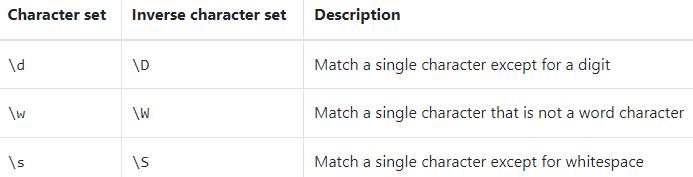

* The following example uses the \D to match the non-digit from a phone number:

In [19]:
import re

phone_no = '+1-(650)-513-0514'
matches = re.finditer('\D', phone_no)
for match in matches:
    print(match.group())

+
-
(
)
-
-


In [20]:
#To turn the phone number +1-(650)-513-0514 into the 16505130514, you can use the sub() function:
import re

phone_no = re.sub('\D', '', '+1-(650)-513-0514')
print(phone_no)

16505130514


* In this example, the sub() function replaces the character that matches the pattern \D with the literal string '' in the formatted phone number.

### **The dot(.) character set**
* The dot (.) character set matches any single character except the new line (\n). 
* The following example uses the dot (.) character set to match every single character but the new line:


In [21]:
import re

version = "Python\n4"
matches = re.finditer('.', version)
for match in matches:
    print(match.group())

P
y
t
h
o
n
4


## **Python Regex Anchors**
### **Introduction to the regex anchors**
* Regular expressions provide you with two anchors that match the positions of characters:

  * **^** – the caret anchor matches at the beginning of a string.
  * **$** – the dollar anchor matches at the end of a string.
The following example uses the \d\d to match two digits in a time string:

In [22]:
#The following example uses the \d\d to match two digits in a time string:
import re

time = '12:20'
matches = re.finditer('\d\d', time)
for match in matches:
    print(match.group())

12
20


In [23]:
#If you use the caret anchor (^), you’ll get one group which is the two digits at the beginning of the string. For example:
import re

time = '12:20'
matches = re.finditer('^\d\d', time)
for match in matches:
    print(match.group())

12


In [24]:
#Similarly, if you use the $ anchor, you’ll get the last two digits because the $ matches \d\d at the end of the time string:
import re

time = '12:20'
matches = re.finditer('\d\d$', time)
for match in matches:
    print(match.group())

20


In [25]:
#To check if a string is a time string, you can combine the caret (^) and dollar ($) anchors. For example:
import re

time = '12:20'
matches = re.finditer('^\d\d:\d\d$', time)
for match in matches:
    print(match.group())

12:20


* Note that the pattern ^\d\d:\d\d$ doesn’t validate the valid hour and minute. For example, it also matches the following string:
  
  * 30:99

* It’s not a valid time string because the valid hour is from 1 to 24 and the valid minute is from 00 to 59. Later, you’ll learn how to match the time string with valid values using the alternation.

## **Python Regex Word Boundary**
### **Introduction to the Python regex word boundary**
* A string has the following positions that qualify as word boundaries:

  * Before the first character in the string if the first character is a word character (\w).
  * Between two characters in the string if the first character is a word character (\w) and the other is not (\W – inverse character set of the word character \w).
  * After the last character in a string if the last character is the word character (\w)
* The following picture shows the word boundary positions in the string "PYTHON 3!":<BR />
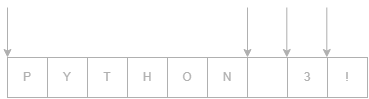

* In this example, the "PYTHON 3!" string has four word boundary positions:

  * Before the letter P (criteria #1)
  * After the letter N (criteria #2)
  * Before the digit 3 (criteria #2)
  * After the digit 3 (criteria #2)
* Regular expressions use the \b to represent a word boundary. For example, you can use the \b to match the whole word using the following pattern:<br />
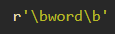

* The following example matches the word Python in a string:

In [26]:
import re

s = 'CPython is the implementation of Python in C'
matches = re.finditer('Python', s)
for match in matches:
    print(match.group())

Python
Python


* It returns two matches, one in the word CPython and another in the word Python. However, if you use the word boundary \b, the program returns one match:

In [27]:
import re

s = 'CPython is the implementation of Python in C'
matches = re.finditer(r'\bPython\b', s)
for match in matches:
    print(match.group())


Python


* In this example, the '\bPython\b' pattern match the whole word Python in the string 'CPython is the implementation of Python in C'.


## **Python Regex Quantifiers**

### **Introduction to Python regex quantifiers**
* In regular expressions, quantifiers match the preceding characters or character sets a number of times. 
* The following table shows all the quantifiers and their meanings:<br />
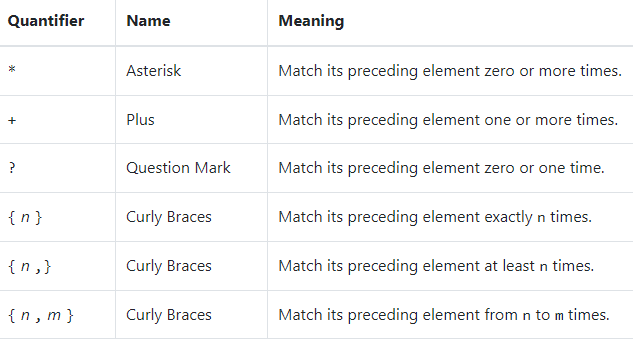

### **Match zero or more times (*)**
* The quantifier (*) matches its preceding element zero or more times. 
* For example, the following program uses the * quantifier to match any string that ends with Python:

In [28]:
import re

s = """CPython, IronPython, and JPython 
       are major Python's implementation"""

matches = re.finditer('\w*Python', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 7), match='CPython'>
<re.Match object; span=(9, 19), match='IronPython'>
<re.Match object; span=(25, 32), match='JPython'>
<re.Match object; span=(51, 57), match='Python'>


* In this example:

  * The \w matches any single word character.
  * So the \w* matches zero or more word characters.
  * Therefore, the \w*Python match any zero or more characters followed by the string Python.
* As a result, the \w*Python pattern matches CPython, IronPython, JPython, and Python in the string:
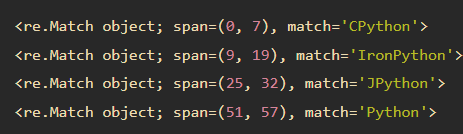

### **Match one or more times (+)**
* The **+** quantifier matches its preceding element one or more times. For example, the \d+ matches one or more digits.

* The following example uses the + quantifier to match one or more digits in a string:


In [29]:
import re

s = "Python 3.10 was released in 2021"

matches = re.finditer('\d+', s)

for match in matches:
    print(match)

<re.Match object; span=(7, 8), match='3'>
<re.Match object; span=(9, 11), match='10'>
<re.Match object; span=(28, 32), match='2021'>


### **Match zero or one time (?)**
* The **?** quantifier matches its preceding element zero or one time.

* The following example uses the (?) quantifier to match both strings color and colour:

In [30]:
import re

s = "What color / colour do you like?"

matches = re.finditer('colou?r', s)

for match in matches:
    print(match)

<re.Match object; span=(5, 10), match='color'>
<re.Match object; span=(13, 19), match='colour'>


* In this example, the u? matches zero or one character u. Therefore, the colou?r pattern matches both color and colour

### **Match Exactly n Times: {n}**
* The {n} quantifier matches its preceding element exactly n times, where n is zero or a positive integer.

* For example, the following program uses the quantifier {n} to match a time string in the hh:mm format:


In [31]:
import re

s = "It was 11:05 AM"

matches = re.finditer('\d{2}:\d{2}', s)

for match in matches:
    print(match)

<re.Match object; span=(7, 12), match='11:05'>


*  this example, the \d{2} matches exactly two digits. Therefore, the \d{2}:\d{2} matches a string that starts with two digits, a colon :, and ends with two digits.

### **Match at least n times: {n,}**
* The **{n,}** quantifier matches its preceding element at least n times, where n is zero or a positive integer.

* For example, the following program uses the {n, } quantifier to match the date strings with the m-d-yyyy or mm-dd-yyyy format:

In [32]:
import re

s = "5-5-2021 or 05-05-2021 or 5/5/2021"

matches = re.finditer('\d{1,}-\d{1,}-\d{4}', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='5-5-2021'>
<re.Match object; span=(12, 22), match='05-05-2021'>


### **Match from n and m times: {n,m}**
* The {n,m} quantifier matches its preceding element at least n times, but no more than m times, where n and m are zero or a positive integer. 
* For example:


In [33]:
import re

s = "5-5-2021 or 05-05-2021 or 5/5/2021"

matches = re.finditer('\d{1,2}-\d{1,2}-\d{4}', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='5-5-2021'>
<re.Match object; span=(12, 22), match='05-05-2021'>


* In this example, the pattern \d{1,2} matches one or two digits. So the pattern \d{1,2}-\d{1,2}-\d{4} matches a date string in the d-m-yyyy or dd-mm-yyyy format.

## **Python Regex Greedy**
* By default, all quantifiers work in a greedy mode. It means that the quantifiers will try to match their preceding elements as much as possible.

* Let’s start with an example to understand how the regex greedy mode works.

### **The unexpected result with greedy mode**
* Suppose you have the following HTML fragment that represents a button element:<br />
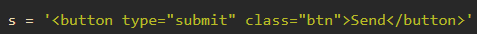

* And you want to match the texts within the quotes ("") like submit and btn.

* To do that, you may come up with the following pattern that includes the quote (“), the dot (.) character set and the (+) quantifier:

  * **".+"**

* The meaning of the pattern is as follows:

  * " starts with a quote
  * . matches any character except the newline
  * + matches the preceding character one or more times
  * " ends with a quote
* The following uses the finditer() function to match the string s with the pattern:

In [34]:
import re

s = '<button type="submit" class="btn">Send</button>'

pattern = '".+"'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())

"submit" class="btn"


* The program displays the following result: <br />
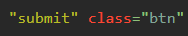

* The result is not what you expected.

* By default, the quantifier (+) runs in the greedy mode, in which it tries to match the preceding element (".) as much as possible.

### **How Python regex greedy mode works?**
* First, the regex engine starts matching from the first character in the string s.

* Next, because the first character is < which does not match the quote ("), the regex engine continues to match the next characters until it reaches the first quote ("):<br />
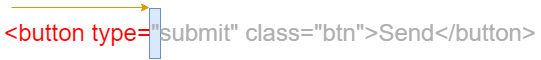

* Then, the regex engine examines the pattern and matches the string with the next rule **.+**.

* Because the **.+** rule matches a character one or more times, the regex engine matches all characters until it reaches the end of the string:
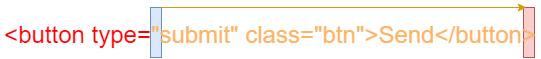

* After that, the regex engine examines the last rule in the pattern, which is a quote (“). However, it already reaches the end of the string. There’s no more character to match. It is too greedy to go too far.

* Finally, the regex engine goes back from the end of the string to find the quote (“). This step is called **backtracking**.
<b />
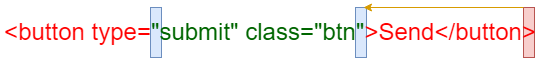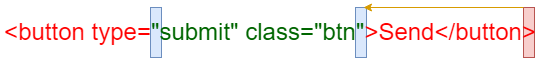

* As a result, the match is the following substring which is not what we expected:<br />
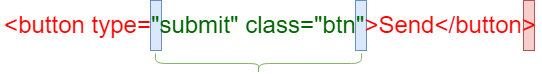



* To fix this issue, you need to instruct the quantifier (+) to use the non-greedy (or lazy) mode instead of the greedy mode.

* To do that, you add a question mark (?) after the quantifier like this:
  * **".+?"**

* The following program returns the expected result:

In [35]:
import re

s = '<button type="submit" class="btn">Send</button>'

pattern = '".+?"'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())

"submit"
"btn"


## **Python Regex Non-Greedy**

### **Introduction to the regex non-greedy (or lazy) quantifiers**
* Quantifiers allow you to match their preceding elements a number of times. 
* Quantifiers work in one of two modes: greedy and non-greedy (lazy).

* When quantifiers work in the greedy mode, they are called greedy quantifiers. Similarly, when quantifiers work in the non-greedy mode, they’re called non-greedy quantifiers or lazy quantifiers.

* By default, quantifiers work in the greedy mode. It means the greedy quantifiers will match their preceding elements as much as possible to return to the biggest match possible.

* On the other hand, the non-greedy quantifiers will match as little as possible to return the smallest match possible. non-greedy quantifiers are the opposite of greedy ones.

* To turn greedy quantifiers into non-greedy quantifiers, you add an extra question mark (?) to the quantifiers. The following table shows the greedy and their corresponding non-greedy quantifiers:
<br />
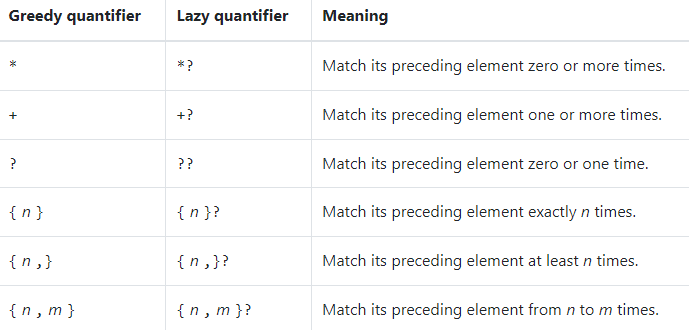